In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import urllib
from pathlib import Path
import os
import urllib

pd.options.display.max_columns = 50

In [35]:
relative_path = '/raw/train.csv'

cur_wd = os.getcwd()

file_path = cur_wd + relative_path


True


In [25]:
def load_set_data(target_month, outlier_cutoff):
    relative_path = '/raw/train.csv'
    cur_wd = os.getcwd()
    file_path = cur_wd + relative_path

    if not Path(file_path).exists():
        print('Filepath does not exist in the "raw" folder. Check again')
        
    else:
        print('Loading and cleaning data.')

    d_types = {'ID': str, 'Customer_ID': str, 'Month': str, 'Name': str, 'Age': int, 'SSN': str, 'Occupation': str, 'Annual_Income': str, 'Monthly_Inhand_Salary': float, 'Num_Bank_Accounts': int, 'Num_Credit_Card': int, 'Interest_Rate': int, 'Num_of_Loan': int,'Type_of_Loan': str,
'Delay_from_due_date': int, 'Num_of_Delayed_Payment': int, 'Changed_Credit_Limit': float, 'Num_Credit_Inquiries': float, 'Credit_Mix': str, 'Outstanding_Debt': float, 'Credit_Utilization_Ratio': float, 'Credit_History_Age': float, 'Payment_of_Min_Amount': str, 'Total_EMI_per_month': float,
       'Amount_invested_monthly': float, 'Payment_Behaviour': str, 'Monthly_Balance':float, 'Credit_Score':str}


    df = pd.read_csv(file_path)
    df['Annual_Income'] = df['Annual_Income'].str.replace('_', '').astype(float)
    df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace('_', '').astype(float)
    single_month_frame = df[df['Month'] ==  target_month]
    single_month_frame = single_month_frame[single_month_frame['Type_of_Loan'] !=  'Auto Loan']
    single_month_frame = single_month_frame[single_month_frame['Amount_invested_monthly'] < outlier_cutoff]
    single_month_frame = single_month_frame[single_month_frame['Annual_Income'] < 500000.0]
    

    return single_month_frame

In [18]:
datag = load_set_data('April' , 8000)

print(np.max(datag['Annual_Income']))
print(np.min(datag['Annual_Income']))

Loading and cleaning data.


/var/folders/d7/l8wqbmzx3m74cqmpn7nsvgch0000gn/T/ipykernel_82954/1223604927.py:17: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


24177153.0
7005.93


Loading and cleaning data.


/var/folders/d7/l8wqbmzx3m74cqmpn7nsvgch0000gn/T/ipykernel_82954/291337087.py:17: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


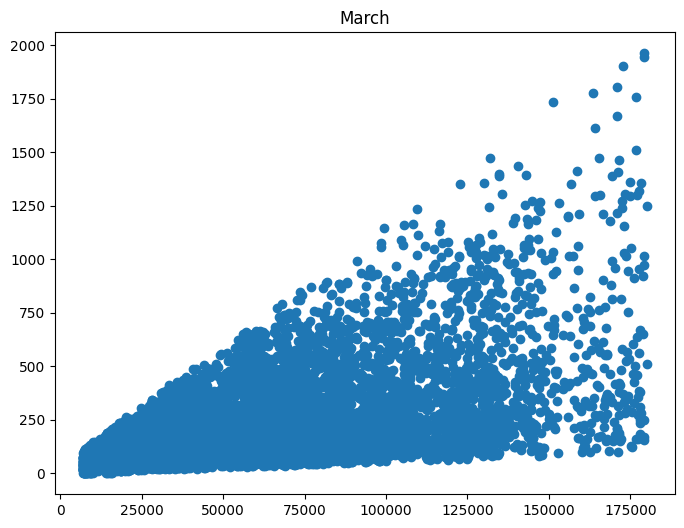

Loading and cleaning data.


/var/folders/d7/l8wqbmzx3m74cqmpn7nsvgch0000gn/T/ipykernel_82954/291337087.py:17: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


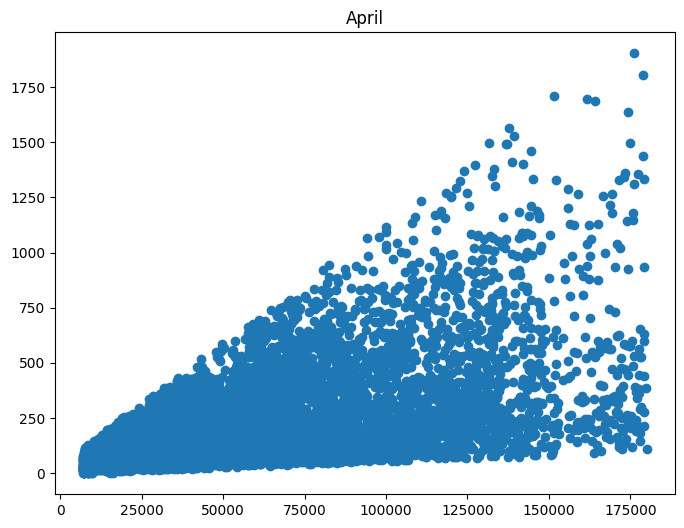

Loading and cleaning data.


/var/folders/d7/l8wqbmzx3m74cqmpn7nsvgch0000gn/T/ipykernel_82954/291337087.py:17: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


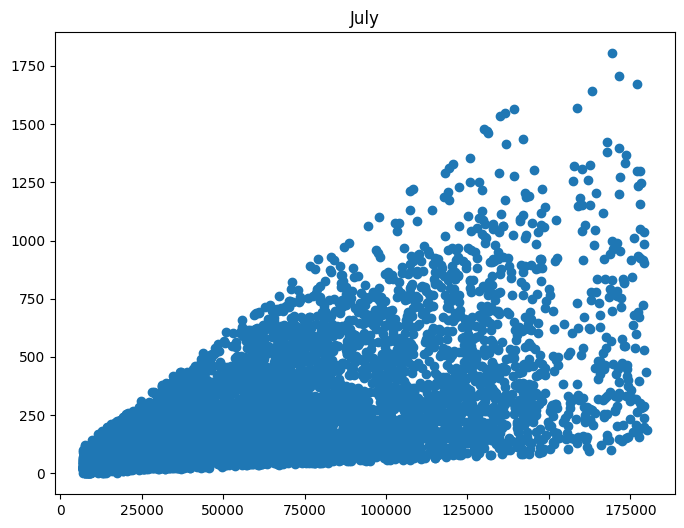

In [27]:



months = [ 'March' , 'April' , 'July' ]

for mn in months:
    dataf = load_set_data(mn , 5000)
    plt.figure(figsize=(8,6))
    plt.scatter(x=dataf['Annual_Income'] , y=dataf['Amount_invested_monthly'])
    plt.title(mn)
    plt.show()

